# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [181]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [183]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [184]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()

In [185]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [186]:
# Change the index to 'linename'
df= df.set_index('linename')
df

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348


Reset the index: 

In [187]:
# Reset the index

df.reset_index(inplace = True)



Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [188]:
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [189]:
# Add a new 'num_lines' column
# Create the 'Num_Lines' column by counting the number of characters in 'linename'
df['Num_Lines'] = df['linename'].apply(lambda x: len(x))

# Sort the DataFrame by the 'Num_Lines' column in descending order
df_sorted = df.sort_values(by='Num_Lines', ascending=False)
df_sorted


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12
...,...,...,...,...,...,...,...,...,...,...,...,...
112565,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/27/2018,09:28:23,REGULAR,28975,12659,1
112564,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/27/2018,05:16:23,REGULAR,28319,12541,1
112563,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/27/2018,01:04:23,REGULAR,28318,12541,1
112562,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/26/2018,20:52:23,REGULAR,28305,12531,1


Write a function to clean column names: 

In [190]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines'],
      dtype='object')

In [191]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = df.columns.str.strip()
    return cleaned

In [192]:
# Use the above function to clean the column names
df.columns = [clean(col) for col in df.columns]

In [193]:
# Check to ensure the column names were cleaned
# Take the first level of the MultiIndex and assign it to the DataFrame's columns
df.columns = df.columns.get_level_values(0)
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [194]:
df['date'].dtypes

dtype('O')

In [204]:
# Convert the data type of the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Display the DataFrame
print(df)

       linename  unit        station division       date      time     desc  \
0       NQR456W  R051          59 ST      BMT 2018-08-25  00:00:00  REGULAR   
1       NQR456W  R051          59 ST      BMT 2018-08-25  04:00:00  REGULAR   
2       NQR456W  R051          59 ST      BMT 2018-08-25  08:00:00  REGULAR   
3       NQR456W  R051          59 ST      BMT 2018-08-25  12:00:00  REGULAR   
4       NQR456W  R051          59 ST      BMT 2018-08-25  16:00:00  REGULAR   
...         ...   ...            ...      ...        ...       ...      ...   
197620        R  R469  RIT-ROOSEVELT      RIT 2018-08-31  05:00:00  REGULAR   
197621        R  R469  RIT-ROOSEVELT      RIT 2018-08-31  09:00:00  REGULAR   
197622        R  R469  RIT-ROOSEVELT      RIT 2018-08-31  13:00:00  REGULAR   
197623        R  R469  RIT-ROOSEVELT      RIT 2018-08-31  17:00:00  REGULAR   
197624        R  R469  RIT-ROOSEVELT      RIT 2018-08-31  21:00:00  REGULAR   

        entries    exits  Num_Lines day_of_week  
0

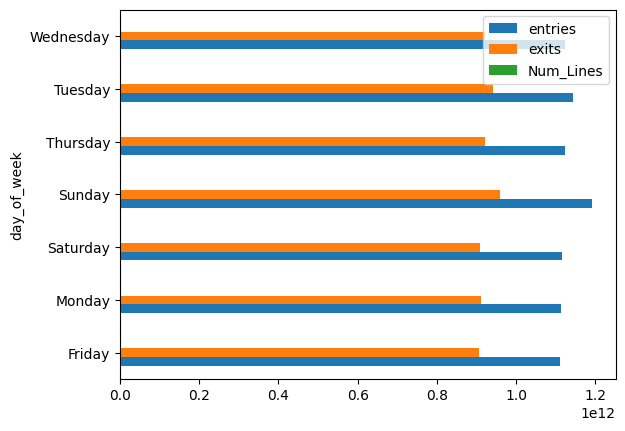

In [205]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [206]:
# Reset the index of grouped
grouped = grouped.reset_index()
grouped.head(5)

# Print the first five rows of grouped


,day_of_week,entries,exits,Num_Lines
0,Friday,1110224700078,906799065337,75573
1,Monday,1114237052454,911938153513,76110
2,Saturday,1115661545514,909142081474,74725
3,Sunday,1192306179082,959223750461,75306
4,Thursday,1122723988662,920691927110,76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [208]:
# Use this dictionary to create a new column 
weekend_map = {'Friday': False, 'Monday': False, 'Saturday': True, 'Sunday': True, 'Thursday': False, 'Tuesday': False, 'Wednesday': False}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)
grouped

,day_of_week,entries,exits,Num_Lines,is_weekend
0,Friday,1110224700078,906799065337,75573,False
1,Monday,1114237052454,911938153513,76110,False
2,Saturday,1115661545514,909142081474,74725,True
3,Sunday,1192306179082,959223750461,75306,True
4,Thursday,1122723988662,920691927110,76607,False
5,Tuesday,1143313287046,942230721477,77303,False
6,Wednesday,1123655222441,920630864687,75713,False


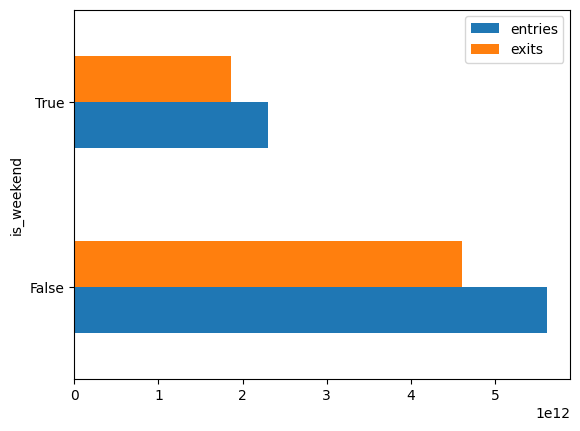

In [209]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [200]:
grouped

,day_of_week,entries,exits,Num_Lines,is_weekend
0,Friday,1110224700078,906799065337,75573,NaN
1,Monday,1114237052454,911938153513,76110,NaN
2,Saturday,1115661545514,909142081474,74725,NaN
3,Sunday,1192306179082,959223750461,75306,NaN
4,Thursday,1122723988662,920691927110,76607,NaN
5,Tuesday,1143313287046,942230721477,77303,NaN
6,Wednesday,1123655222441,920630864687,75713,NaN


In [201]:
# Remove the 'c/a' and 'scp' columns
df = df.drop('c/a',axis =1)
df = df.drop('scp',axis = 1)
df.head(5)

,linename,unit,station,division,date,time,desc,entries,exits,Num_Lines,day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,NQR456W,R051,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,NQR456W,R051,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,NQR456W,R051,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 


## Summary

You practiced your data cleanup skills using Pandas.